In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# I: Roulette Simulation and Profit Analysis

## 1. Game Simulation

In [ ]:
import random
def game_simulator(N):
    balance = 0
    for i in range(N):
        random_number = random.randint(1,38)
        if random_number < 19:
            balance += 1
        else:
            balance += -1

    return balance

## 2. Monte Carlo Simulation of Earnings for Different Values of N

Monte Carlo function

In [ ]:
def monte_carlo_simulation(N_values, simulations=100000):
    results = {}

    for N in N_values:
        total_earnings = [game_simulator(N) for _ in range(simulations)]
        results[N] = total_earnings

    return results

In [ ]:
N_values = [10, 25, 100, 1000]
results = monte_carlo_simulation(N_values)

Plotting the results

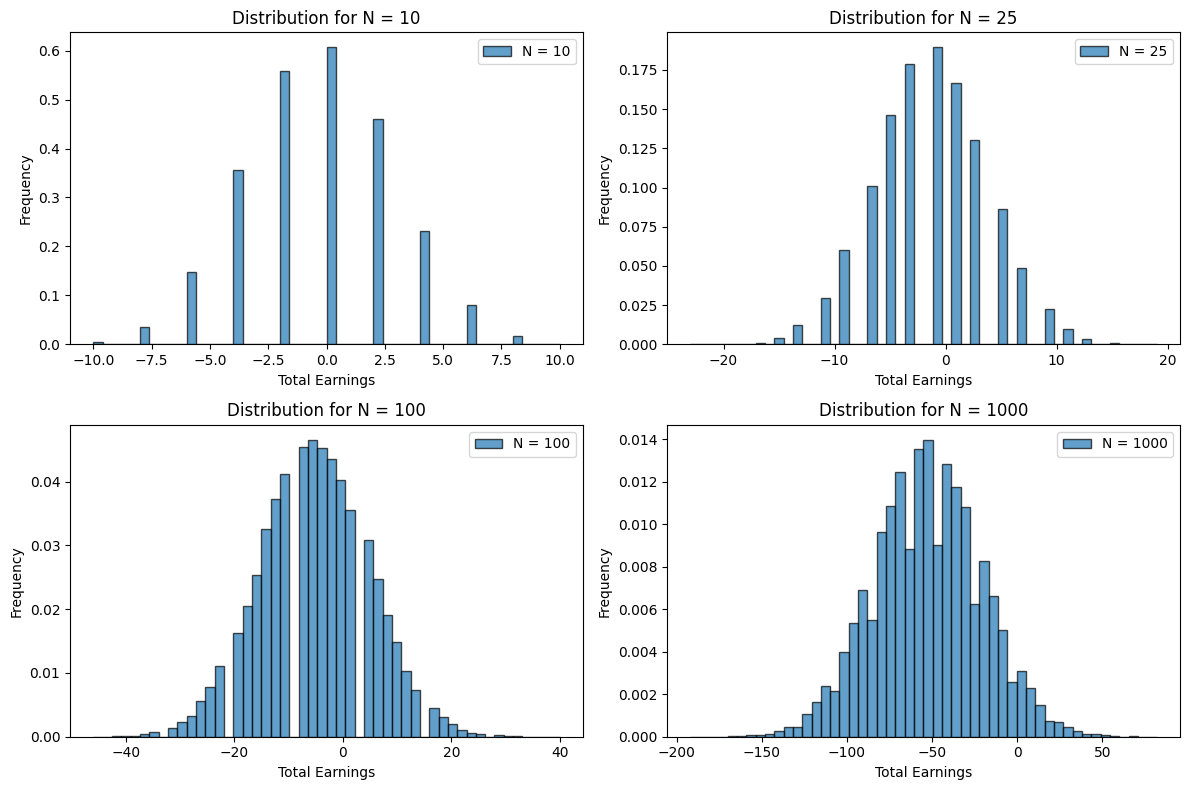

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, N in enumerate(N_values):
    axes[idx].hist(results[N], bins=50, density=True, alpha=0.7, label=f'N = {N}', edgecolor='black')
    axes[idx].set_title(f'Distribution for N = {N}')
    axes[idx].set_xlabel('Total Earnings')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()


plt.tight_layout()
plt.show()

As shown above, distributions appear similar to normal distribution.

Analyze expected values and standard errors change with N

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_results(results):
    expected_values = {}
    standard_errors = {}

    for N, earnings in results.items():
        expected_values[N] = np.mean(earnings)
        std_dev = np.std(earnings)
        standard_errors[N] = std_dev / np.sqrt(len(earnings))

    return expected_values, standard_errors


In [ ]:
expected_values, standard_errors = analyze_results(results)

Plotting the result

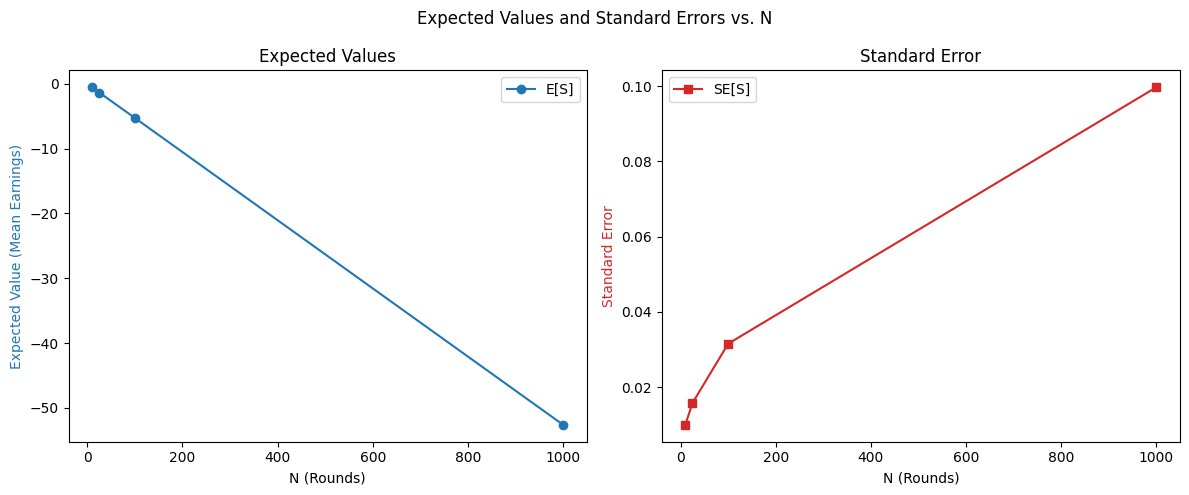

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(N_values, [expected_values[N] for N in N_values], 'o-', color='tab:blue', label='E[S]')
axes[0].set_title('Expected Values')
axes[0].set_xlabel('N (Rounds)')
axes[0].set_ylabel('Expected Value (Mean Earnings)', color='tab:blue')
axes[0].legend()

axes[1].plot(N_values, [standard_errors[N] for N in N_values], 's-', color='tab:red', label='SE[S]')
axes[1].set_title('Standard Error')
axes[1].set_xlabel('N (Rounds)')
axes[1].set_ylabel('Standard Error', color='tab:red')
axes[1].legend()

fig.suptitle('Expected Values and Standard Errors vs. N')

fig.tight_layout()
plt.show()


As to be seen above expected value has a linear dependency and standard error has square root-like dependency with N.

## 3. Monte Carlo Simulation of Average Earnings for Different Values of N

We divide the result by N in order to get average winnings.

In [ ]:
def average_monte_carlo_simulation(N_values, simulations=100000):
    results = {}

    for N in N_values:
        total_earnings = [game_simulator(N)/N for _ in range(simulations)]
        results[N] = total_earnings

    return results

In [ ]:
N_values = [10, 25, 100, 1000]
results_average = average_monte_carlo_simulation(N_values)

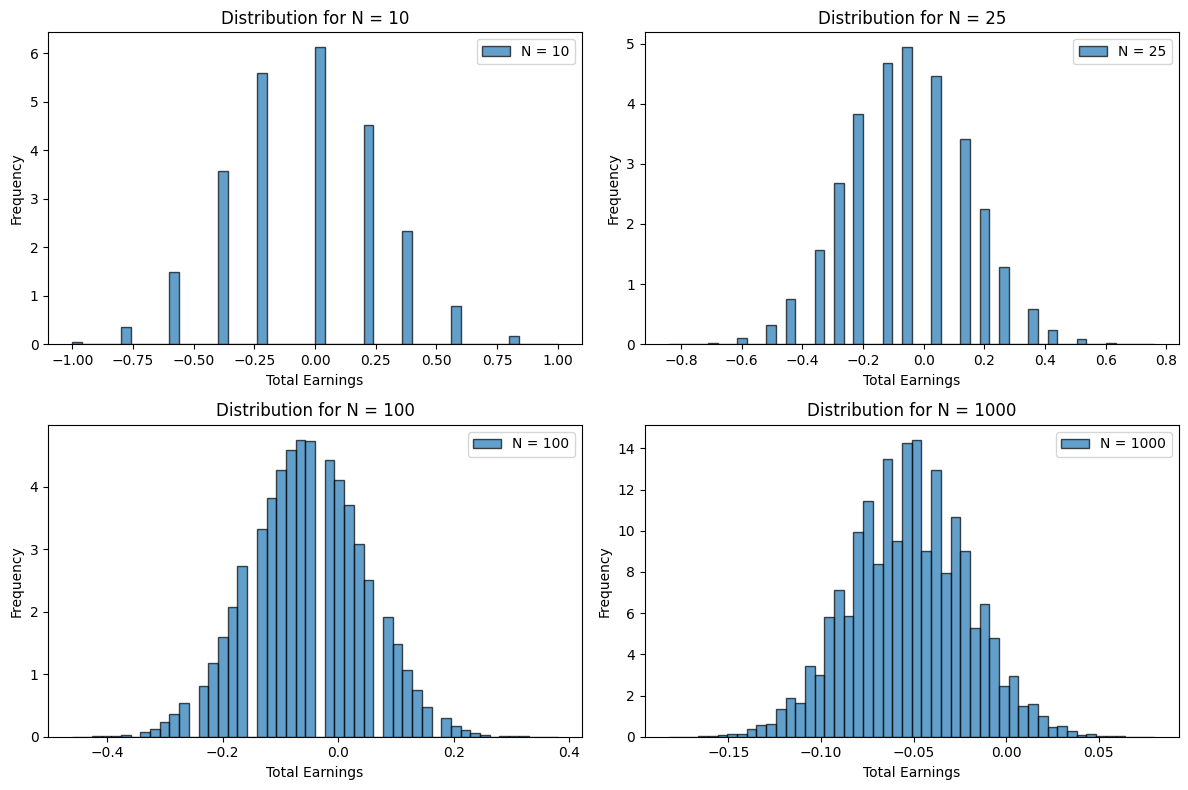

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, N in enumerate(N_values):
    axes[idx].hist(results_average[N], bins=50, density=True, alpha=0.7, label=f'N = {N}', edgecolor='black')
    axes[idx].set_title(f'Distribution for N = {N}')
    axes[idx].set_xlabel('Total Earnings')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

Distribution forms are still normal distribution.

Examine expected values and standard errors with different values of N

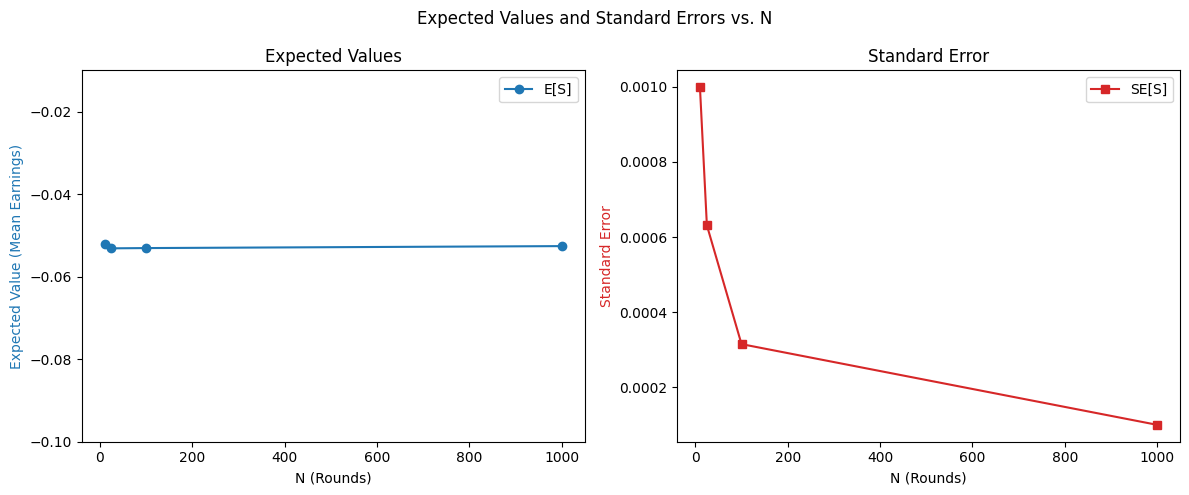

In [ ]:
expected_values_average, standard_errors_average = analyze_results(results_average)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(N_values, [expected_values_average[N] for N in N_values], 'o-', color='tab:blue', label='E[S]')
axes[0].set_title('Expected Values')
axes[0].set_xlabel('N (Rounds)')
axes[0].set_ylabel('Expected Value (Mean Earnings)', color='tab:blue')
y_min = -0.1
y_max = -0.01
axes[0].set_ylim(y_min, y_max)
axes[0].legend()

axes[1].plot(N_values, [standard_errors_average[N] for N in N_values], 's-', color='tab:red', label='SE[S]')
axes[1].set_title('Standard Error')
axes[1].set_xlabel('N (Rounds)')
axes[1].set_ylabel('Standard Error', color='tab:red')
axes[1].legend()

fig.suptitle('Expected Values and Standard Errors vs. N')

fig.tight_layout()
plt.show()

The result shows that expected value for average winning is near -0.056 and standard error decreases with higher N.

## 4. Theoretical Expected Value and Standard Error

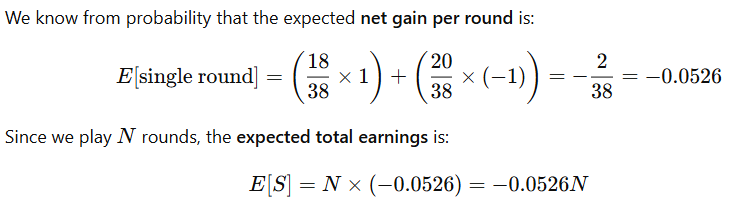

In [3]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/university/term_6/data_science/CAs/CA0/Images/Theoretical_expectedvalue.png')

Theoretical standard error

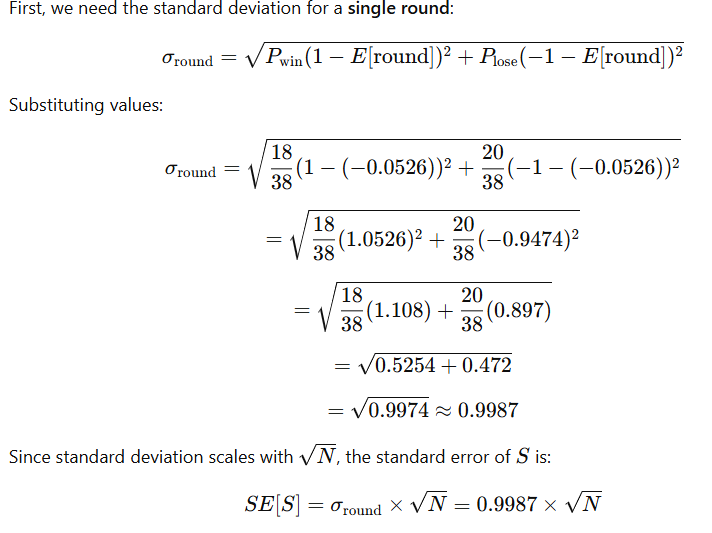

In [6]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/university/term_6/data_science/CAs/CA0/Images/Theoretical_standard_error.png')


Plotting theoretical vs practical

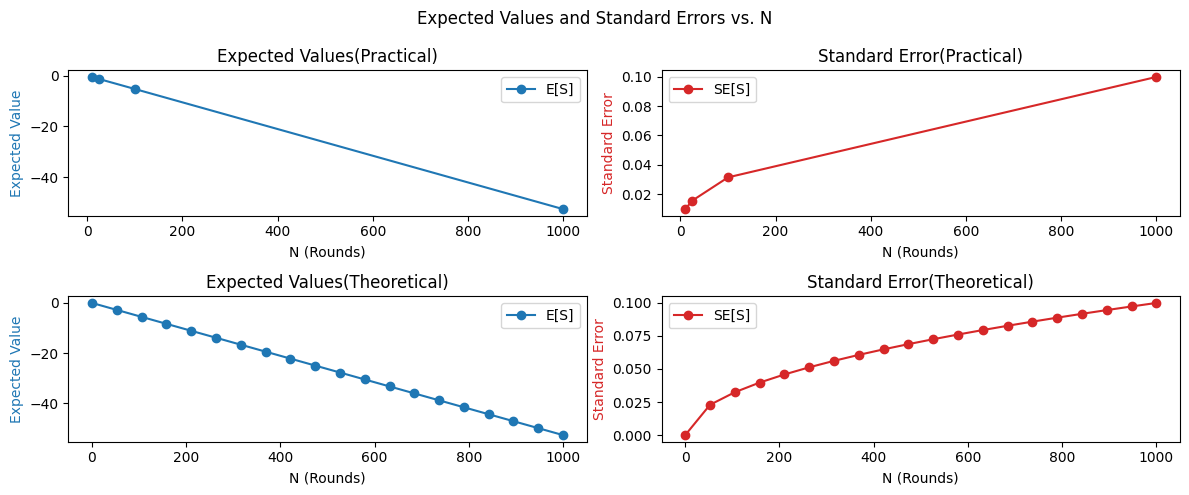

In [ ]:
import matplotlib.pyplot as plt

t = np.linspace(0, 1000, 20)
expected_values_theory = -0.0526 * t
standard_errors_theory = np.sqrt(0.9986 *t)/np.sqrt(100000)

fig, axes = plt.subplots(2, 2, figsize=(12, 5))

axes[0][0].plot(N_values, [expected_values[N] for N in N_values], 'o-', color='tab:blue', label='E[S]')
axes[0][0].set_title('Expected Values(Practical)')
axes[0][0].set_xlabel('N (Rounds)')
axes[0][0].set_ylabel('Expected Value', color='tab:blue')
axes[0][0].legend()

axes[1][0].plot(t, expected_values_theory, 'o-', color='tab:blue', label='E[S]')
axes[1][0].set_title('Expected Values(Theoretical)')
axes[1][0].set_xlabel('N (Rounds)')
axes[1][0].set_ylabel('Expected Value', color='tab:blue')
axes[1][0].legend()

axes[0][1].plot(N_values, [standard_errors[N] for N in N_values], 'o-',color='tab:red', label='SE[S]')
axes[0][1].set_title('Standard Error(Practical)')
axes[0][1].set_xlabel('N (Rounds)')
axes[0][1].set_ylabel('Standard Error', color='tab:red')
axes[0][1].legend()

axes[1][1].plot(t, standard_errors_theory, 'o-',color='tab:red', label='SE[S]')
axes[1][1].set_title('Standard Error(Theoretical)')
axes[1][1].set_xlabel('N (Rounds)')
axes[1][1].set_ylabel('Standard Error', color='tab:red')
axes[1][1].legend()

fig.suptitle('Expected Values and Standard Errors vs. N')

fig.tight_layout()
plt.show()

As you can see, the result from theoretical is so close to the practical one.
Also, the chosen N values are shown in dot.

## 5. CLT Approximation of the probability that the Casino Loses Money

Problem defenition

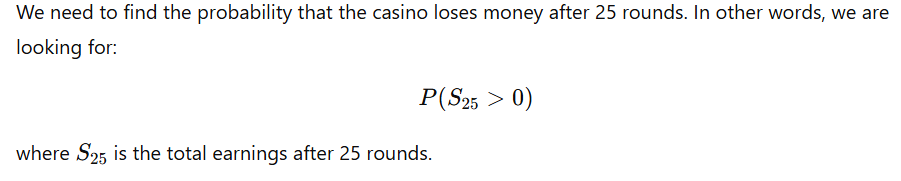

In [8]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/university/term_6/data_science/CAs/CA0/Images/CLT1.png')

Compute Theoretical Mean and Standard Deviation

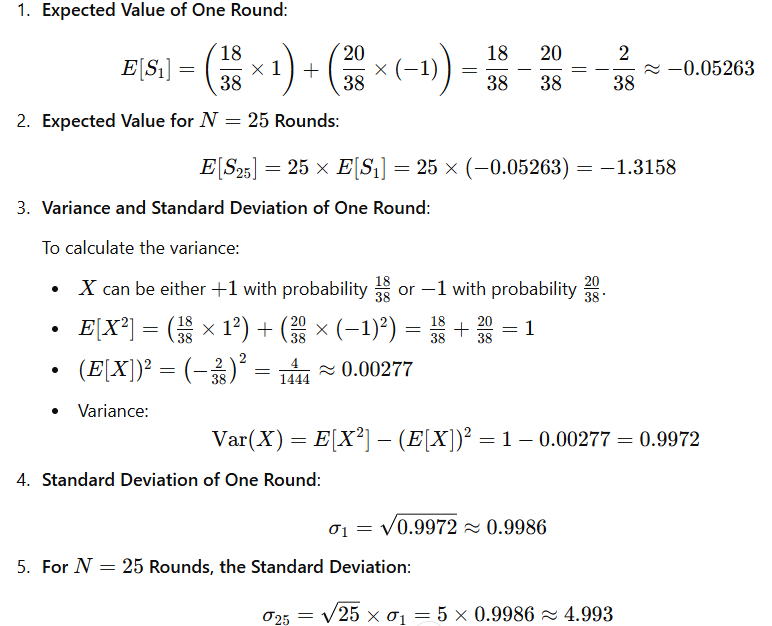

In [9]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/university/term_6/data_science/CAs/CA0/Images/CLT2.png')

Compute the Probability using CLT

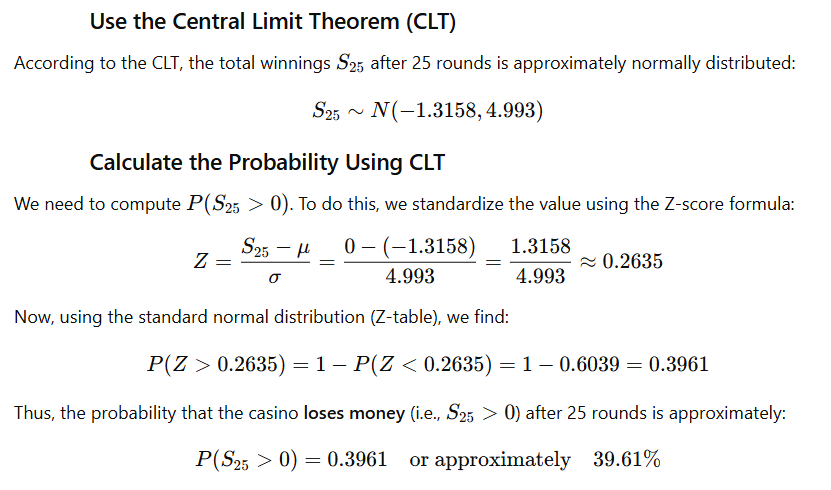

In [10]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/university/term_6/data_science/CAs/CA0/Images/CLT3.png')

Monte Carlo simulation for validation

In [ ]:
def get_casino_loss_probablity(N , simulations = 100000):
    losses = sum(1 for _ in range(simulations) if game_simulator(N) > 0)
    return losses / simulations;

In [ ]:
N = 25
simulated_probability_of_loss = get_casino_loss_probablity(N)
print(f"Simulated Probability of Casino Losing Money (N=25): {simulated_probability_of_loss*100:.2f}%")

Simulated Probability of Casino Losing Money (N=25): 39.45%


## 6. Why do Casinos Encourage People to Play More?

In [ ]:
N_values = np.linspace(25, 1001, 5).astype(int)

simulated_probs = [get_casino_loss_probablity(N) for N in N_values]

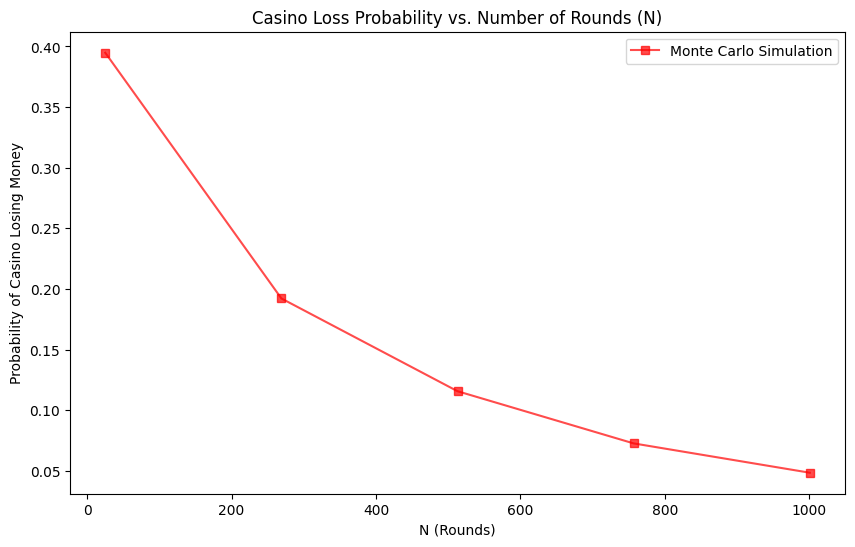

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, simulated_probs, 'r-s', label='Monte Carlo Simulation', alpha=0.7)

plt.xlabel('N (Rounds)')
plt.ylabel('Probability of Casino Losing Money')
plt.title('Casino Loss Probability vs. Number of Rounds (N)')
plt.legend()
plt.show()

As you can see the more you play(N) the probability of casino losing decreases. So, that is the reason casinos encourage you to play more.

# II: Predicting the Outcome of the 2016 USA Presidential Election

In [ ]:
import pandas as pd
import scipy.stats as stats
import math
from tabulate import tabulate
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


## 1. Calculate Boundaries Using the CLT Theorem
First, we define a function that calculates the CLT boundaries taking the sample mean and standard deviation.


In [ ]:
def calculate_CL_std(the_p, n):
    return  math.sqrt(the_p * (1- the_p)/n)

def calculate_the_bounds(the_p, the_std):
    confidence = 0.95
    the_z = 1-((1-confidence)/2)
    z_score = stats.norm.ppf(the_z)

    treshold_lower = the_p - z_score * the_std
    treshold_upper  = the_p + z_score * the_std

    return [treshold_lower, treshold_upper]

In [ ]:
calculate_the_bounds(.47, calculate_CL_std(.47, 30))


[0.2914029309465105, 0.6485970690534895]

In this example, we calculate the 95% confidence interval when we have a sample of 30 observations and the sample mean is 0.47. We can see that the interval $=[0.2914 , 0.6486]$.

## 2. Monte Carlo Simulation to Validate the CLT Theorem

Next, we are going to write a function that performs Monte Carlo simulation. This function will get the number of experiments, the sample size and the true population mean and performs the Monte Carlo simulation. At each experiment it creates one sample and calculates the CLT confidence interval. If the true p is indeed inside the boundaries it adds to the number of total valid intervals. In the end, it prints the number of valid intervals divided by total number of intervals which gives us the accuracy of the CLT confidence intervals.

In [ ]:
def monte_carlo_clt(number_of_shots, number_of_each_shot, actual_p):
    total_success = 0
    for i in range(number_of_shots):
        total_ones = 0
        for j in range(number_of_each_shot):
            the_random_number = random.random()
            if(the_random_number <= actual_p):
                total_ones+=1
        the_tresholds = calculate_the_bounds(total_ones/number_of_each_shot, calculate_CL_std(total_ones/number_of_each_shot, number_of_each_shot))
        treshold_lower = the_tresholds[0]
        treshold_upper = the_tresholds[1]
        if(actual_p >= treshold_lower and actual_p <= treshold_upper):
            total_success +=1

    print("win rate = ", total_success/ number_of_shots)

monte_carlo_clt(100000, 30, .47)

win rate =  0.93241


In [ ]:
monte_carlo_clt(100000, 50, .47)

win rate =  0.95249


We can see that as we increase the sample size the CLT intervals become much more accurate. This is not surprising to us as we knew that the larger the sample size the closer the distribution of the sample mean will get to a normal distribution and therefore, the more accurate the CLT confidence intervals will get.

## 3. Preprocess the Dataset

In [ ]:
presidential_df = pd.read_csv("/content/drive/My Drive/university/term_6/data_science/CAs/CA0/2016-general-election-trump-vs-clinton.csv")
print(list(presidential_df))

['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)', 'Number of Observations', 'Population', 'Mode', 'Trump', 'Clinton', 'Other', 'Undecided', 'Pollster URL', 'Source URL', 'Partisan', 'Affiliation', 'Question Text', 'Question Iteration']


In [ ]:
print(presidential_df['Affiliation'].unique())
print(len(presidential_df[presidential_df['Affiliation']!='nan']))
print(presidential_df['Number of Observations'].isnull().sum())


[nan 'Rep' 'Dem' 'Other']
1522
509


In [ ]:
presidential_df = presidential_df.dropna(subset=['Number of Observations'])
presidential_df = presidential_df[presidential_df['Affiliation']!='nan']
print(len(presidential_df))

1013


In [ ]:
headers = ["Trump", "Clinton", "Pollster", "Start Date", "Number of Observations", "Mode", "End Date"]
presidential_df = presidential_df[headers]
presidential_df.head()

,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode,End Date
0,41.0,45.0,Insights West,2016-11-04,940.0,Internet,2016-11-07
4,43.0,41.0,IBD/TIPP,2016-11-04,1107.0,Live Phone,2016-11-07
5,41.0,45.0,YouGov/Economist,2016-11-04,3669.0,Internet,2016-11-07
6,6.0,90.0,YouGov/Economist,2016-11-04,1392.0,Internet,2016-11-07
7,84.0,4.0,YouGov/Economist,2016-11-04,1110.0,Internet,2016-11-07


## 4. Plot the Poll Results Sorted by Date


In [ ]:
presidential_df["date"] = pd.to_datetime(presidential_df["End Date"])
def plot_clinton_trump(presidential_df, trump_col, clinton_col):
  plt.figure(figsize=(12, 6))

  sns.lineplot(x="date", y=clinton_col, data=presidential_df, label=clinton_col, color="blue", errorbar=None)
  sns.lineplot(x="date", y=trump_col, data=presidential_df, label=trump_col, color="red", errorbar=None)

  ax = plt.gca()
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
  ax.xaxis.set_major_locator(mdates.MonthLocator())

  plt.xlabel("Date")
  plt.ylabel("Support Percentage")
  plt.title("2016 Presidential Poll Trends")
  plt.legend()

  plt.show()


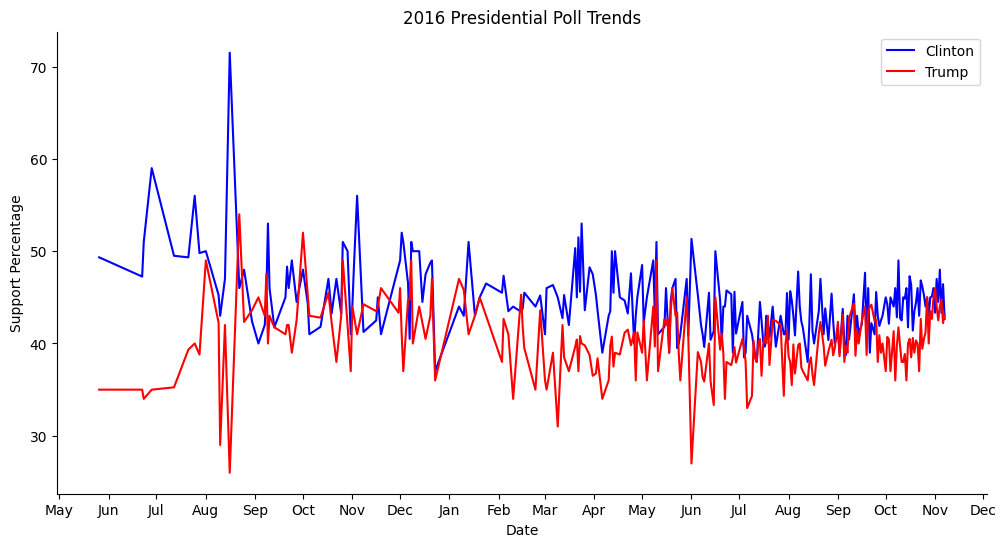

In [ ]:
plot_clinton_trump(presidential_df, "Trump", "Clinton")

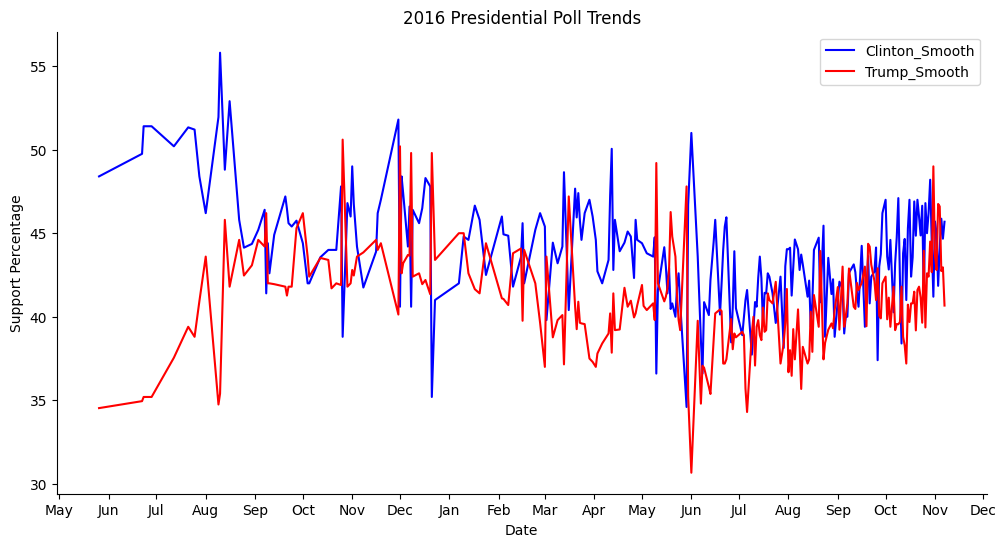

In [ ]:
smoothing_window = 5
presidential_df["Clinton_Smooth"] = presidential_df["Clinton"].rolling(window=smoothing_window, min_periods=1).mean()
presidential_df["Trump_Smooth"] = presidential_df["Trump"].rolling(window=smoothing_window, min_periods=1).mean()
plot_clinton_trump(presidential_df, "Trump_Smooth", "Clinton_Smooth")

## 5. Get the Total Number of Participants of the Polls

In [ ]:
total_voters = presidential_df["Number of Observations"].sum()
print(total_voters)

1940931.0


## 6. Calculate the Sample Probability of Votes for Trump and Clinton


In [ ]:
total_trump_voters = (presidential_df["Number of Observations"] * presidential_df["Trump"]/100).sum()
total_clinton_voters = (presidential_df["Number of Observations"] * presidential_df["Clinton"]/100).sum()
trump_estimated_p = total_trump_voters/ total_voters
clinton_estimated_p =  total_clinton_voters/ total_voters
df = pd.DataFrame([trump_estimated_p,clinton_estimated_p], index=["Trump", "Clinton",])
print(tabulate(df, tablefmt='grid'))

+---------+----------+
| Trump   | 0.405834 |
+---------+----------+
| Clinton | 0.456121 |
+---------+----------+


## 7. Calculate the CLT Bounds Based on the Observations


In [ ]:
print("Trump")
print(calculate_the_bounds(trump_estimated_p, calculate_CL_std(trump_estimated_p, total_voters)))
print("Clinton")
print(calculate_the_bounds(clinton_estimated_p, calculate_CL_std(clinton_estimated_p, total_voters)))


Trump
[0.4051427160362902, 0.4065243756841263]
Clinton
[0.45542010669318844, 0.4568215134365329]


## 8. Examine if the Difference Between the two Candidates is Statistically Significant

### a. Calculate the Sample Statistics

In [ ]:
the_clinton_p = total_clinton_voters / (total_clinton_voters + total_trump_voters)
the_trump_p = 1 - the_clinton_p
the_d = the_clinton_p - the_trump_p
the_std = 2*calculate_CL_std(the_clinton_p, total_clinton_voters + total_trump_voters)
print("the sample d = ", the_d, "the d std= ", the_std )
print(calculate_the_bounds(the_d, 2*calculate_CL_std(the_clinton_p, total_clinton_voters + total_trump_voters)))


the sample d =  0.058340982743434244 the d std=  0.0007718136571377911
[0.05682825577266803, 0.05985370971420046]


### b. Perform the P-Value Test on the Difference
In this section we are going to conduct a hypothesis test to determine if the spread d is statically significant or not. We have our null hypothesis as $H_0: d=0$ and we have our alternative hypothesis as $H_a: d \neq 0$. so we are going to calculate $P(\hat{d} \geq 0.0583 \vee \hat{d} \leq -0.0583 \mid d = 0)$ which equals $2 \times P(\hat{d} \geq 0.0583 \mid d = 0)$


In [ ]:
threshold = the_d
z_statistic = (threshold - 0) / the_std
p_value = 2*(1 - stats.norm.cdf(threshold, loc=0, scale=the_std))
print("z-statistic=", z_statistic,"pvalue=", p_value)

z-statistic= 75.5894667111581 pvalue= 0.0


We can see that the p value is really low and we can confidently reject the null hypothesis. This means that the spread is significantly different from 0.

# III: Drug Safety Test


Import the dependencies

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

## 1. Load the Dataset into a Pandas Dataframe

In [ ]:
df = pd.read_csv("/content/drive/My Drive/university/term_6/data_science/CAs/CA0/drug_safety.csv")

## 2. Remove Samples Containing NaN

In [ ]:
print(df["rbc"].isnull().sum())
print(df["wbc"].isnull().sum())
print(len(df))
print(len(df.dropna(subset=['wbc', 'rbc'])))

6976
6975
16103
9127


In [ ]:
df = df.dropna(subset=['wbc', 'rbc'])

## 3. Display Basic Statistics

In [ ]:
print(df.describe())

               age         week          wbc          rbc  num_effects
count  9127.000000  9127.000000  9127.000000  9127.000000  9127.000000
mean     64.007670     4.985428     7.340331     4.672784     0.100800
std       8.847711     4.375397     1.996645     0.458520     0.322178
min      39.000000     0.000000     1.800000     2.100000     0.000000
25%      58.000000     2.000000     6.000000     4.400000     0.000000
50%      65.000000     4.000000     7.100000     4.700000     0.000000
75%      71.000000     8.000000     8.400000     5.000000     0.000000
max      84.000000    20.000000    26.500000     7.600000     3.000000


## 4. Group the Dataset by trx (Drug vs. Placebo) and Summarize Key statistics

In [ ]:
wbc_stat = df.groupby('trx')[['wbc']].describe()
print(wbc_stat)
print('\n')

rbc_stat = df.groupby('trx')[['rbc']].describe()
print(rbc_stat)
print('\n')

num_effects_stat = df.groupby('trx')[['num_effects']].describe()
print(num_effects_stat)

            wbc                                                    
          count      mean       std  min  25%   50%  75%        max
trx                                                                
Drug     6011.0  7.330461  2.008941  1.8  6.0  7.00  8.4  26.500000
Placebo  3116.0  7.359371  1.972890  3.0  6.0  7.15  8.4  23.799999


            rbc                                             
          count      mean       std  min  25%  50%  75%  max
trx                                                         
Drug     6011.0  4.679130  0.454990  2.7  4.4  4.7  5.0  7.5
Placebo  3116.0  4.660542  0.465083  2.1  4.4  4.7  5.0  7.6


        num_effects                                             
              count      mean       std  min  25%  50%  75%  max
trx                                                             
Drug         6011.0  0.102479  0.325529  0.0  0.0  0.0  0.0  3.0
Placebo      3116.0  0.097561  0.315639  0.0  0.0  0.0  0.0  3.0


## 5. Change Adverse_effects to Define Mean for it

In [ ]:
df['adverse_effects'] = df['adverse_effects'].map({'Yes': 1, 'No': 0})
print(df[['adverse_effects']].head())

   adverse_effects
0                0
2                0
4                0
6                1
7                1


In [ ]:
wbc_stat = df.groupby('trx')[['wbc']].describe()
print(wbc_stat)
print()

rbc_stat = df.groupby('trx')[['rbc']].describe()
print(rbc_stat)
print()

num_effects_stat = df.groupby('trx')[['num_effects']].describe()
print(num_effects_stat)
print()

adverse_effects_stat = df.groupby('trx')[['adverse_effects']].describe()
print(adverse_effects_stat)

            wbc                                                    
          count      mean       std  min  25%   50%  75%        max
trx                                                                
Drug     6011.0  7.330461  2.008941  1.8  6.0  7.00  8.4  26.500000
Placebo  3116.0  7.359371  1.972890  3.0  6.0  7.15  8.4  23.799999


            rbc                                             
          count      mean       std  min  25%  50%  75%  max
trx                                                         
Drug     6011.0  4.679130  0.454990  2.7  4.4  4.7  5.0  7.5
Placebo  3116.0  4.660542  0.465083  2.1  4.4  4.7  5.0  7.6


        num_effects                                             
              count      mean       std  min  25%  50%  75%  max
trx                                                             
Drug         6011.0  0.102479  0.325529  0.0  0.0  0.0  0.0  3.0
Placebo      3116.0  0.097561  0.315639  0.0  0.0  0.0  0.0  3.0


        adverse_effects 

## 6. Determine if the Difference Between the Placebo and Drug Groups is Statistically Significant

For each metric below, we are going to determine if they differ significantly between the Drug and Placebo groups:<br>
<br>
a. mean white blood cell count<br>
b. mean red blood cell count<br>
c. mean num effects<br>
d. mean adverse effect<br>


In [ ]:
from scipy.stats import ttest_ind
import numpy as np

In [ ]:
def calculate_mean_std_len(df, the_column):
    mean = df[the_column].mean()
    std = df[the_column].std()
    length = len(df)
    return [mean, std, length]


drug_df = df[df["trx"] == "Drug"]
placebo_df = df[df["trx"] == "Placebo"]

mean_wbc_drug, std_wbc_drug, n_wbc_drug = calculate_mean_std_len(drug_df, "wbc")
mean_rbc_drug, std_rbc_drug, n_rbc_drug = calculate_mean_std_len(drug_df, "rbc")
mean_num_effects_drug, std_num_effects_drug, n_num_effects_drug = calculate_mean_std_len(drug_df, "num_effects")
mean_adverse_effects_drug, std_adverse_effects_drug, n_adverse_effects_drug = calculate_mean_std_len(drug_df, "adverse_effects")

mean_wbc_placebo, std_wbc_placebo, n_wbc_placebo = calculate_mean_std_len(placebo_df, "wbc")
mean_rbc_placebo, std_rbc_placebo, n_rbc_placebo = calculate_mean_std_len(placebo_df, "rbc")
mean_num_effects_placebo, std_num_effects_placebo, n_num_effects_placebo = calculate_mean_std_len(placebo_df, "num_effects")
mean_adverse_effects_placebo, std_adverse_effects_placebo, n_adverse_effects_placebo = calculate_mean_std_len(placebo_df, "adverse_effects")


In [ ]:
def independent_t_test(mean1, std1, n1, mean2, std2, n2):
    pooled_se = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    t_stat = (mean1 - mean2) / pooled_se
    return t_stat

t_wbc = independent_t_test(mean_wbc_drug, std_wbc_drug, n_wbc_drug, mean_wbc_placebo, std_wbc_placebo, n_wbc_placebo)
t_rbc = independent_t_test(mean_rbc_drug, std_rbc_drug, n_rbc_drug, mean_rbc_placebo, std_rbc_placebo, n_rbc_placebo)
t_num_effects = independent_t_test(mean_num_effects_drug, std_num_effects_drug, n_num_effects_drug, mean_num_effects_placebo, std_num_effects_placebo, n_num_effects_placebo)
t_adverse_effects = independent_t_test(mean_adverse_effects_drug, std_adverse_effects_drug, n_adverse_effects_drug, mean_adverse_effects_placebo, std_adverse_effects_placebo, n_adverse_effects_placebo)

print(f"T-Statistic for WBC: {t_wbc}")
print(f"T-Statistic for RBC: {t_rbc}")
print(f"T-Statistic for num Effect Rate: {t_num_effects}")
print(f"T-Statistic for Adverse Effect Rate: {t_adverse_effects}")


T-Statistic for WBC: -0.6596884009910966
T-Statistic for RBC: 1.823923144420727
T-Statistic for num Effect Rate: 0.6982668655752835
T-Statistic for Adverse Effect Rate: 0.6047130244978375


df (degree of freedom) = 3116 + 6011 - 2 = 9125

critical t-value = 1.962

Since none of the t-values we calculated above are more than 1.962, we fail to reject them.

In [ ]:
from scipy.stats import ttest_ind_from_stats

def perform_t_test(mean1, std1, n1, mean2, std2, n2, alpha=0.05):
    t_stat, p_value = ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=False)

    result = "Reject H₀ (Significant difference)" if p_value < alpha else "Fail to reject H₀ (No significant difference)"

    return t_stat, p_value, result


def print_test_results_with_aplha(alpha):
  print("printing results of tests using alpha = ", alpha)
  print("==============================================")
  t_wbc, p_wbc, result_wbc = perform_t_test(mean_wbc_drug, std_wbc_drug, n_wbc_drug,
                                            mean_wbc_placebo, std_wbc_placebo, n_wbc_placebo, alpha)

  t_rbc, p_rbc, result_rbc = perform_t_test(mean_rbc_drug, std_rbc_drug, n_rbc_drug,
                                            mean_rbc_placebo, std_rbc_placebo, n_rbc_placebo, alpha)

  t_num_effects, p_num_effects, result_num_effects = perform_t_test(mean_num_effects_drug, std_num_effects_drug, n_num_effects_drug,
                                                        mean_num_effects_placebo, std_num_effects_placebo, n_num_effects_placebo, alpha)

  t_adverse, p_adverse, result_adverse = perform_t_test(mean_adverse_effects_drug, std_adverse_effects_drug, n_adverse_effects_drug,
                                                        mean_adverse_effects_placebo, std_adverse_effects_placebo, n_adverse_effects_placebo, alpha)


  print(f"WBC: T-Statistic = {t_wbc}, P-Value = {p_wbc}, Conclusion: {result_wbc}")
  print(f"RBC: T-Statistic = {t_rbc}, P-Value = {p_rbc}, Conclusion: {result_rbc}")
  print(f"Num Effect Rate: T-Statistic = {t_num_effects}, P-Value = {p_num_effects}, Conclusion: {result_num_effects}")
  print(f"Adverse Effect Rate: T-Statistic = {t_adverse}, P-Value = {p_adverse}, Conclusion: {result_adverse}")



In [ ]:
print_test_results_with_aplha(0.05)

printing results of tests using alpha =  0.05
WBC: T-Statistic = -0.6596884009910966, P-Value = 0.5094775322580594, Conclusion: Fail to reject H₀ (No significant difference)
RBC: T-Statistic = 1.823923144420727, P-Value = 0.06821193346979537, Conclusion: Fail to reject H₀ (No significant difference)
Num Effect Rate: T-Statistic = 0.6982668655752835, P-Value = 0.48503538645813093, Conclusion: Fail to reject H₀ (No significant difference)
Adverse Effect Rate: T-Statistic = 0.6047130244978375, P-Value = 0.5453911089256428, Conclusion: Fail to reject H₀ (No significant difference)


If we set $
𝛼
=
0.1$
(or 10%), it means we are allowing a higher chance (10%) of making a Type I error (rejecting a true null hypothesis).
We require less evidence to reject
$𝐻_0$
  compared to the more common
$𝛼
=
0.05$.
A p-value below 0.1 means we consider the difference statistically significant. In this case, the critical t-value becomes 1.646, and any t-value greater than this number means we can reject the null hypothesis.

In [ ]:
print_test_results_with_aplha(0.1)

printing results of tests using alpha =  0.1
WBC: T-Statistic = -0.6596884009910966, P-Value = 0.5094775322580594, Conclusion: Fail to reject H₀ (No significant difference)
RBC: T-Statistic = 1.823923144420727, P-Value = 0.06821193346979537, Conclusion: Reject H₀ (Significant difference)
Num Effect Rate: T-Statistic = 0.6982668655752835, P-Value = 0.48503538645813093, Conclusion: Fail to reject H₀ (No significant difference)
Adverse Effect Rate: T-Statistic = 0.6047130244978375, P-Value = 0.5453911089256428, Conclusion: Fail to reject H₀ (No significant difference)


The alternative argument specifies the type of hypothesis test we want to perform. The options are:

'two-sided' → Tests if the means are different (default).

'greater' → Tests if the first mean is greater than the second.

'less' → Tests if the first mean is smaller than the second.

For all metrics (wbc, rbc, and adverse_effects), we chose 'two-sided'. We chose it because we are not testing if one group is strictly higher or lower than the other; we just want to know if there is any significant difference in means.
This is the most standard choice when you don’t have a strong directional hypothesis.

The equal_var argument tells the test whether we assume equal variance between the two groups.

equal_var=True → Assumes equal variances (classical Student’s t-test).

equal_var=False → Assumes unequal variances (Welch’s t-test).

We chose False because real-world datasets often have unequal variances between groups and the sample sizes for Drug and Placebo groups are not the same.


# IV: monitoring the oil pipeline pressure (BONUS)

The correct purpose of this estimation is mentioned in the second option. When we construct the 95% confidence interval for μ, we are calculating a range for μ which is the true unknown average pressure of the pipeline. If we sample 100 samples randomly and independently many times and calculate this interval for each sample, we expect the true value of μ to be present in 95% of these intervals. <br>
The first statement is mentioning the sample mean which is known to us. Therefore, it is wrong.<br>
The third statement is completely wrong because of two reasons. First, the statement is talking about the sample population but we know that CLT gives us information about the. Secondly, this statement is talking about individual data points falling into the range. However, CLT gives us information about the mean and doesn't give us information about individual data points.<br>
The fourth statement is correct in the sense that it is talking about the population and not the sample statistics. However, this statement just like the last statement is talking about individual datapoints.

